                id        budget  original_language   popularity      runtime  \
count  3000.000000  3.000000e+03        3000.000000  3000.000000  2998.000000   
mean   1500.500000  2.253133e+07           2.205000     8.463274   107.856571   
std     866.169729  3.702609e+07           4.480885    12.104000    22.086434   
min       1.000000  0.000000e+00           0.000000     0.000001     0.000000   
25%     750.750000  0.000000e+00           1.000000     4.018053    94.000000   
50%    1500.500000  8.000000e+06           1.000000     7.374861   104.000000   
75%    2250.250000  2.900000e+07           1.000000    10.890983   118.000000   
max    3000.000000  3.800000e+08          43.000000   294.337037   338.000000   

            revenue  
count  3.000000e+03  
mean   6.672585e+07  
std    1.375323e+08  
min    1.000000e+00  
25%    2.379808e+06  
50%    1.680707e+07  
75%    6.891920e+07  
max    1.519558e+09  


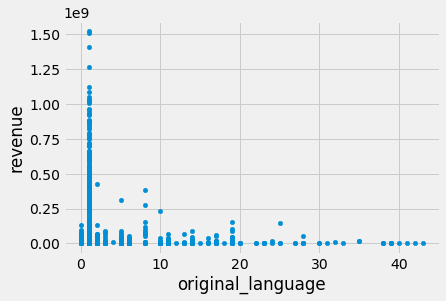

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error


model = KNeighborsRegressor(n_neighbors=2)


train = pd.read_csv(r'/home/qweliantanner/Documents/trace/movie_db_picker/train2.csv')
test = pd.read_csv(r'/home/qweliantanner/Documents/trace/movie_db_picker/test2.csv')
lang ={
    'ja': 0,  'en': 1,  'fr': 2,  'de': 3,  'he': 4,
    'hi': 5,  'ru': 6,  'ka': 7,  'zh': 8,  'th': 9,
    'it': 10, 'es': 11, 'bn': 12, 'sv': 13, 'ko': 14,
    'sr': 15, 'da': 16, 'ta': 17, 'cs': 18, 'cn': 19,
    'ro': 20, 'ca': 21, 'no': 22, 'nl': 23, 'te': 24,
    'tr': 25, 'bm': 26, 'ml': 27, 'pt': 28, 'af': 29, 
    'fi': 30, 'ur': 31, 'el': 32, 'id': 33, 'xx': 34, 
    'pl': 35, 'kn': 36, 'is': 37, 'hu': 38, 'fa': 39, 
    'mr': 40, 'ar': 41, 'nb': 42, 'vi': 43          
        
    }
        
        
train.replace(lang, inplace=True)
test.replace(lang, inplace=True)
print(train.describe())

plt.style.use('fivethirtyeight')
train.plot.scatter(x='original_language', y='revenue')






In [75]:
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,1,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015/02/20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,1,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004/08/06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,1,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014/10/10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,5,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012/03/09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,14,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009/02/05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,1,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,1987/08/06,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,1,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,2012/08/30,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,1,Control Room,A chronicle which provides a rare window into ...,1.949044,...,2004/01/15,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,1,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...

In [76]:
features =['budget']
target = ['revenue']

model.fit(train[features], train[target])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Text(0.5, 1.0, 'Nearest Neighbors Model')

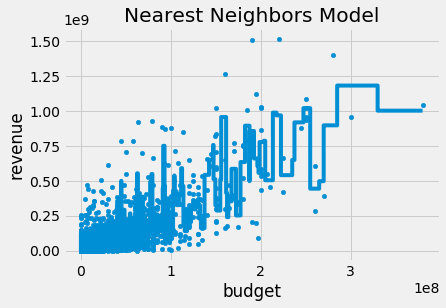

In [77]:
#predicts price of movie based on language


#list of of predictions based on language
budget = [[0+(l*1000)] for l in range(380001)]

predictions = model.predict(budget)


train.plot.scatter(x='budget', y='revenue')
plt.step(budget, predictions)
plt.title('Nearest Neighbors Model')

Text(0.5, 1.0, 'Mean Baseline (Underfit)')

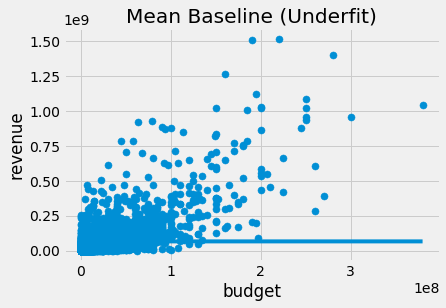

In [78]:

model = DummyRegressor(strategy='mean')


model.fit(train[features], train[target])
predictions = model.predict(budget)


train.plot.scatter(x='budget', y='revenue', s=50)
plt.plot(budget, predictions)
plt.title('Mean Baseline (Underfit)')

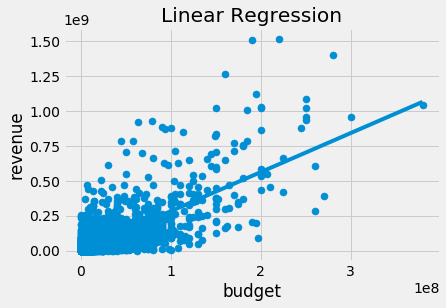

In [80]:
model.coef_, model.intercept_

(array([[2.79686488]]), array([3708754.79757061]))

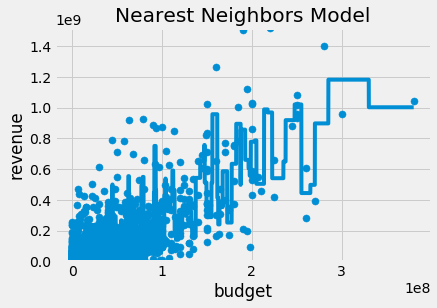

Train Error: $ 44499468.0


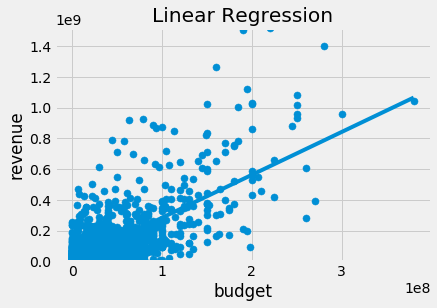

Train Error: $ 45187993.0


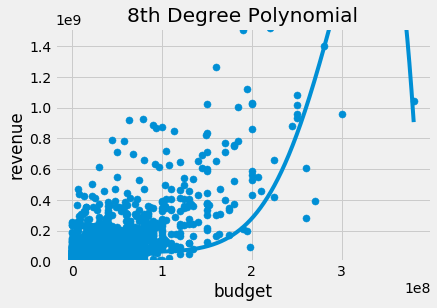

Train Error: $ 70892328.0


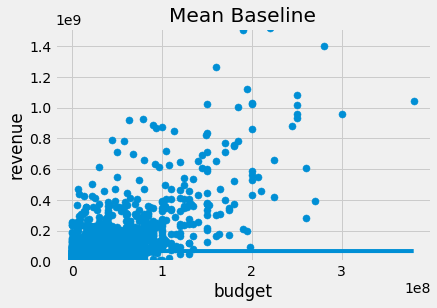

Train Error: $ 77666022.0


In [82]:

# Compare four models
models = [('Nearest Neighbors Model', KNeighborsRegressor(n_neighbors=2)),
          ('Linear Regression', LinearRegression()),
          ('8th Degree Polynomial', make_pipeline(PolynomialFeatures(degree=8), LinearRegression())),
          ('Mean Baseline', DummyRegressor(strategy='mean'))]

for name, model in models:
    
    # Plot training data (blue dots)
    ax = train.plot.scatter(x='budget', y='revenue', s=50)
    
    # Plot testing data (orange dots)
    #test.plot.scatter(x='budget', y='revenue', s=50, color='orange', ax=ax)
    
    # Train model
    model.fit(train[features], train[target])
    
    # Plot predictions (blue line)
    plt.plot(budget, model.predict(budget))
    plt.title(name)
    plt.ylim((-1000, 1519558000))
    plt.show()
    
    # Calculate mean absolute error on the training data
    # (average distance between line and blue dots)
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)
    
    # Calculate mean absolute error on the test data
    # (average distance between line and orange dots)
    '''    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)'''
    
    # Display the errors
    print('Train Error: $', round(train_error))
    #print('Test Error: $', round(test_error), '\n')